In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt

CROSSPATH = '/Users/cosinga/overleaf/higal_cross/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/rvb/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
pplib.imports()

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 12, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.displayAs('post_process', ['corr_coef', 'theory_bias', 'obs_bias'], 
             ['r', '$b_{\\mathrm{th}}$', '$b_{\\mathrm{obs}}$'])

ds.setColors('post_process', ['pink', 'lime', 'cyan'], ['corr_coef', 'theory_bias', 'obs_bias'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setColors('space', ['green', 'orange'], ['real', 'redshift'])
ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setColors('snapshot', 'viridis', snapshots)

ds.setXLabel(pplib.wnum())

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']


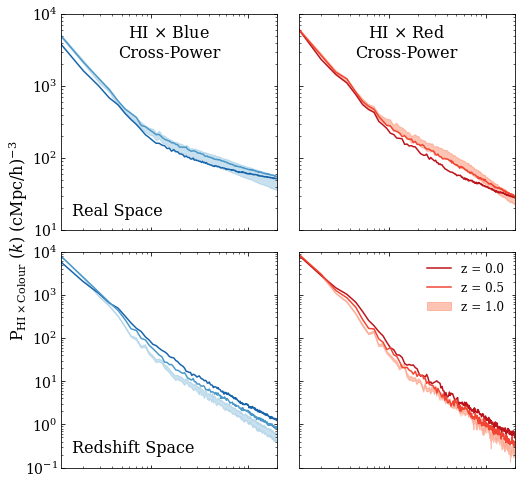

In [3]:

 
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', 'space', 'color', ip)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill()
fg.setFunc({'figrid_process':'fill', 'snapshot':67}, fill_mean)
fg.setFunc({'figrid_process':'fill', 'snapshot':99}, fill_mean)
fg.plotArgs({'figrid_process':'fill', 'snapshot':50}, alpha = 0.5)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
fg.axisArgs(slc = 'redshift', ylim = (.1, 1e4))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.1]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.1, hspace = 0.1)
fg.tickArgs(labelbottom = False)
fg.setYLabel(pplib.pklab('HI', 'Colour'))
fg.setXLabel('')
fg.plot()

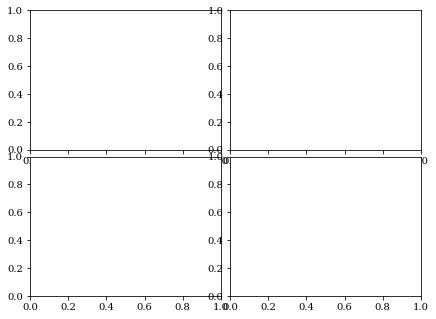

In [43]:
fig, axes = plt.subplots(2, 2, figsize = (7, 5.25), gridspec_kw = {'wspace':0.05, 'hspace':0.05})


The row values for : ['no key found']
The column values for color: ['blue', 'red']


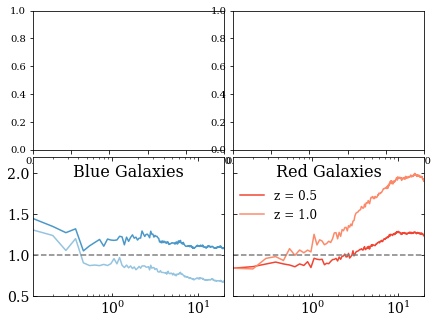

<Figure size 507.6x291.6 with 0 Axes>

In [44]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red'], 'space':['real']}

fg = ds.figrid('snapshot', '', 'color', ip)
fg.axisArgs(ylim = (0.5, 2.2), yscale = 'linear')
fg.autoNorm({'snapshot':99})
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = (0.01, 0.5), slc = (0, 1))
fg.setDefaultTicksParams()
fg.colLabels(['Blue Galaxies', 'Red Galaxies'])

fg.plotOnes()
axesarr = np.empty((1, 2), dtype = 'object')
axesarr[0, 0] = axes[1][0]
axesarr[0, 1] = axes[1][1]
fg.plot(axes = axesarr)
fig

The row values for : ['no key found']
The column values for color: ['resolved']


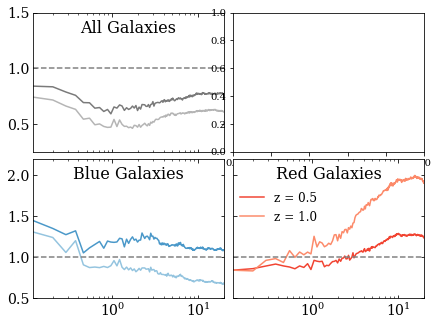

<Figure size 291.6x291.6 with 0 Axes>

In [45]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['resolved'], 'space':['real']}

fg = ds.figrid('snapshot', '', 'color', ip)
fg.axisArgs(ylim = (0.25, 1.5), yscale = 'linear')
fg.autoNorm({'snapshot':99})
fg.setCmap('Greys', snapshots, {'color':'resolved'},)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(rm_legend = True)
fg.setDefaultTicksParams()
fg.tickArgs(labelbottom = False)
fg.colLabels(['All Galaxies'])
fg.setYLabel(pplib.pkrat('Opt', '0'))
fg.plotOnes()
axesarr = np.empty((1, 1), dtype = 'object')
axesarr[0, 0] = axes[0, 0]
fg.plot(axes = axesarr)
fig

The row values for : ['no key found']
The column values for : ['no key found']


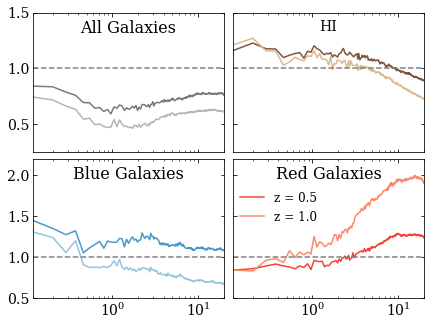

<Figure size 291.6x291.6 with 0 Axes>

In [46]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'snapshot':snapshots, 'space':['real'],
     'snapshot' : [99, 67, 50], 'fieldname':['hiptl', 'vn']}
fg = ds.figrid('snapshot', '', '', ip)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1), wspace = 0, hspace = 0)
fg.setCmap(['#ddb892', '#ddb892', '#7f5539'], snapshots)
fg.autoNorm({'snapshot':99}, ['model'])
fg.autoFill(alpha = 0.6)

fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.setYLabel('')
fg.tickArgs(labelleft = False, labelbottom = False)
# fg.legendArgs(loc = 'lower left')
fg.legendArgs(rm_legend = True)
fg.axisArgs(yscale = 'linear', ylim = [0.25, 1.5])
fg.plotOnes()
fg.setXLabel('')
fg.colLabels(['HI'], pos = [0.5, 0.95])
fg.colLabelArgs(va = 'top', fontsize = 14)
axesarr = np.empty((1, 1), dtype = 'object')
axesarr[0, 0] = axes[0, 1]
fg.plot(axes = axesarr)
fig

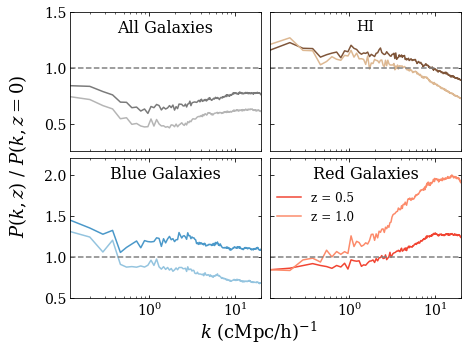

In [47]:
fig.text(0, 0.5, "$P (k, z)$ / $P (k, z = 0)$", rotation = 'vertical', va = 'center', ha = 'left', fontsize = 18)
fig.text(0.5, 0, pplib.wnum(), va = 'bottom', ha = 'center', fontsize = 18)
fig

In [48]:
fig.savefig(CROSSPATH + 'auto_zevo.pdf', dpi = 200, bbox_inches = 'tight')